In [1]:
import sys
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
sys.path.append('..')

In [3]:
from mdgraph.data.protein_graph import pdb_to_nx, plot_protein_graph

In [4]:
G = pdb_to_nx('./data/1FME-unfolded.pdb', 
              select_string='name CA', cutoff=10)

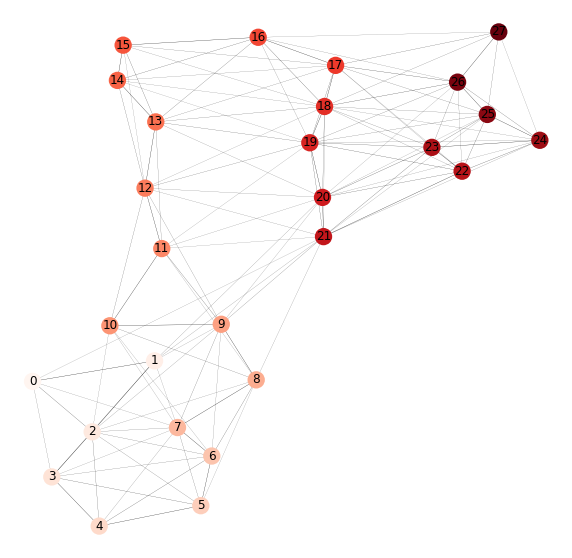

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

node_color = [n[1] for n in G.nodes.data('resnum')]

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

options = {
    'with_labels': True, 
    "linewidths": 0,
    'node_color': node_color,
    "cmap": 'Reds'
}
nx.draw(G, edges=edges, width=weights*10, **options)

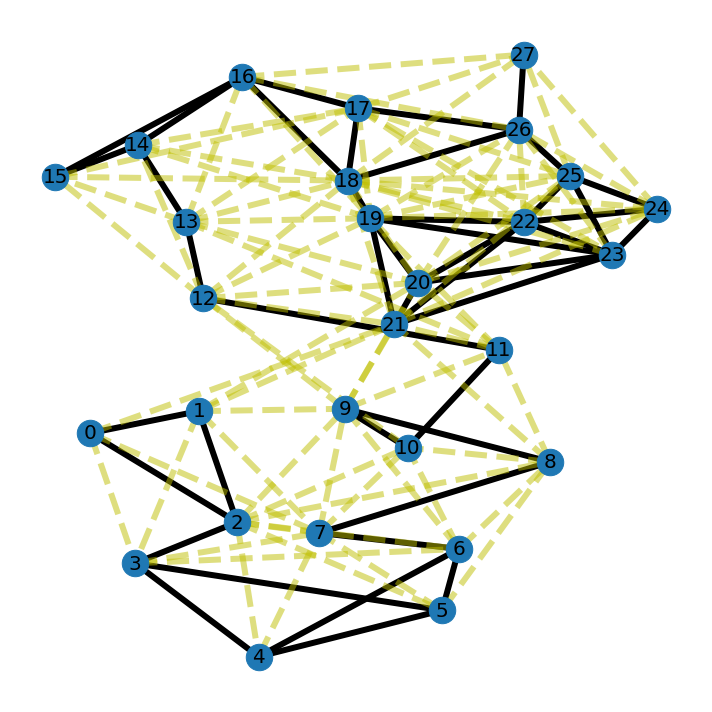

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

node_color = [n[1] for n in G.nodes.data('resnum')]
plot_protein_graph(G, ax)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

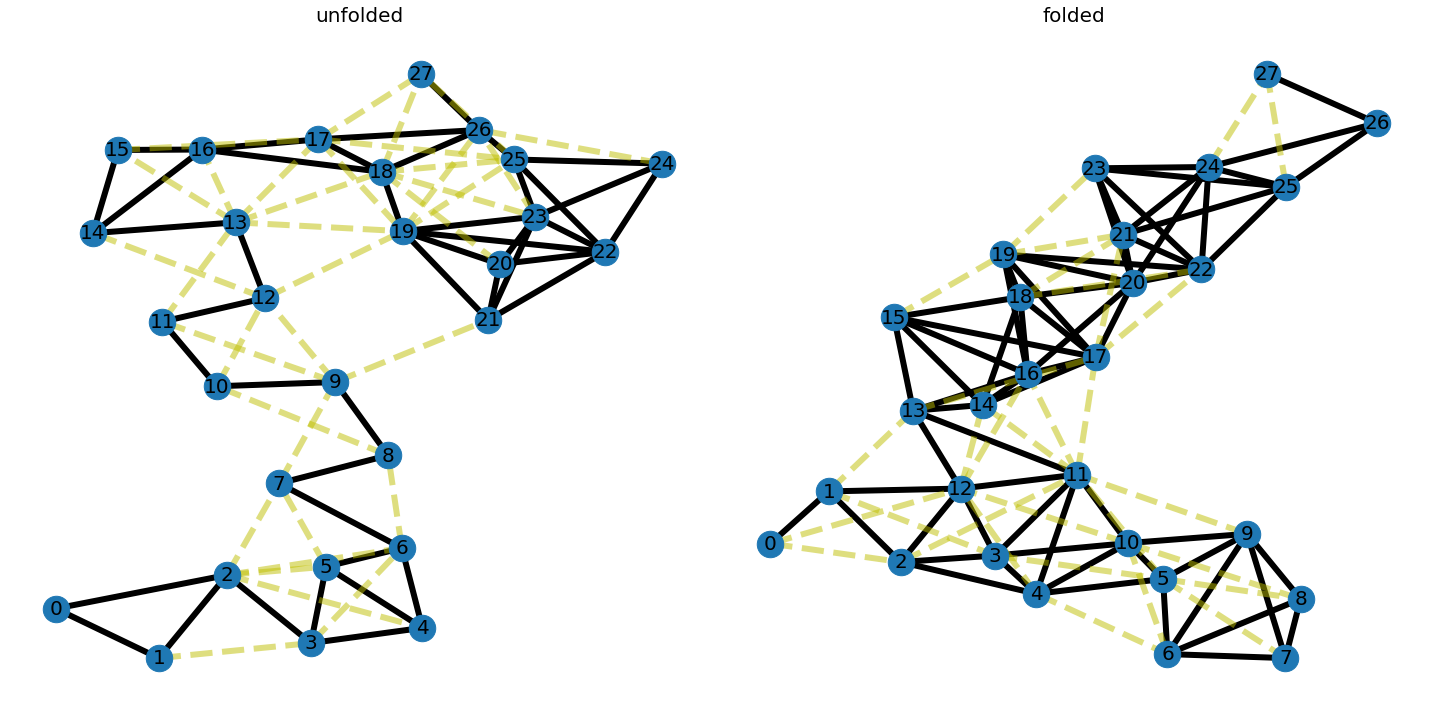

In [7]:
G1 = pdb_to_nx('./data/1FME-unfolded.pdb', 
              select_string='name CA', cutoff=8)

G2 = pdb_to_nx('./data/1FME.pdb', 
              select_string='name CA', cutoff=8)

Gs = [G1, G2]
cutoff = 6
titles = ['unfolded', 'folded']
fig, axes = plt.subplots(ncols=len(Gs), figsize=(20, 10))

for i in range(len(Gs)):
#     plt.sca(ax)
    G = Gs[i]
    ax = axes[i]
    title = titles[i]
    plot_protein_graph(G, ax)
    
    ax.set_title(title, fontsize=20)
    ax.margins(0.08)
    ax.axis("off")
    plt.tight_layout()
    
plt.show()
fig.savefig('test.png', bbox_inches='tight')

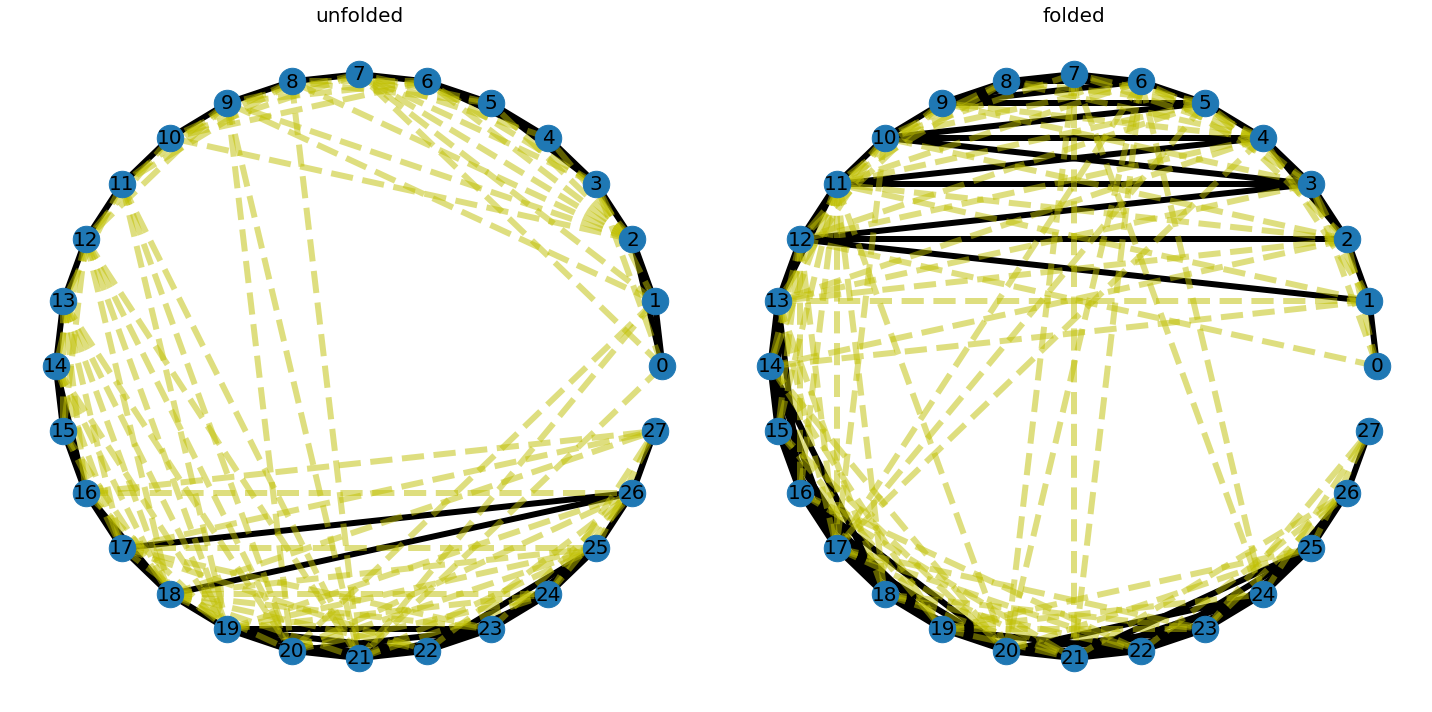

In [8]:
G1 = pdb_to_nx('./data/1FME-unfolded.pdb', 
              select_string='name CA', cutoff=10)

G2 = pdb_to_nx('./data/1FME.pdb', 
              select_string='name CA', cutoff=10)

Gs = [G1, G2]
titles = ['unfolded', 'folded']
fig, axes = plt.subplots(ncols=len(Gs), figsize=(20, 10))

for i in range(len(Gs)):
#     plt.sca(ax)
    G = Gs[i]
    ax = axes[i]
    title = titles[i]
    node_color = [n[1] for n in G.nodes.data('resnum')]

    plot_protein_graph(G, ax, layout_type='circular')
    
    ax.set_title(title, fontsize=20)
    ax.margins(0.08)
    ax.axis("off")
    plt.tight_layout()
    
    
    
plt.show()